In [1]:
from Codigo import *
from statsmodels.tsa.stattools import adfuller
from statsmodels.tools.eval_measures import rmse
import seaborn as sn
from statsmodels.tsa.arima.model import ARIMA
sn.set(style="whitegrid")


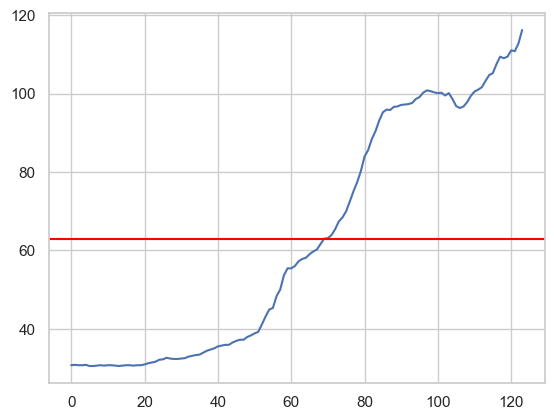

In [2]:
wpi = readdta('wpi1 (stata 15).dta')

plt.plot(wpi['wpi'])
plt.axhline(y = wpi['wpi'].mean(), c = 'red')
plt.show()

Estadístico ADF: -3.6289966257114186
Valor p: 0.005230267642936161
Rechazamos la hipótesis nula; la serie es estacionaria.


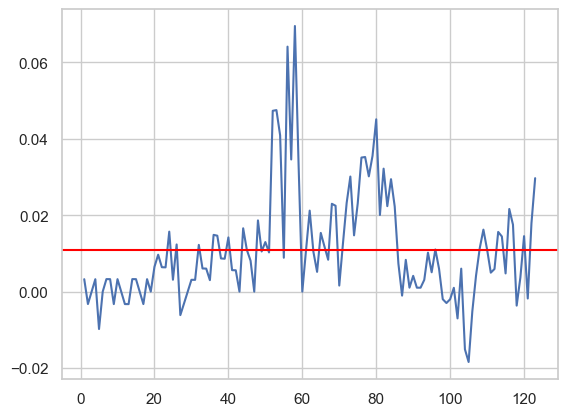

In [3]:
variable = wpi['ln_wpi'].diff().dropna()
DFuller(variable,1)

plt.plot(variable)
plt.axhline(y = variable.mean(), c = 'red')
plt.show()

In [17]:
orden = Pruebatoolkit(variable,4, p_value = 0.05)

Mejor orden encontrado: (1, 0, 1) con AIC: -756.7975599740333


In [15]:
orden = Pruebatoolkit(variable,4, trend = [0], p_value = 0.05)

Mejor orden encontrado: (1, 0, 1) con AIC: -755.1784186158316


In [13]:
from statsmodels.tsa.arima.model import ARIMA
resultado = ARIMA(variable, order = (1,0,1)).fit()
print(resultado.summary())

c:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                 ln_wpi   No. Observations:                  123
Model:                 ARIMA(1, 0, 1)   Log Likelihood                 382.399
Date:                Fri, 08 Dec 2023   AIC                           -756.798
Time:                        15:23:20   BIC                           -745.549
Sample:                             0   HQIC                          -752.228
                                - 123                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0108      0.005      2.020      0.043       0.000       0.021
ar.L1          0.8748      0.044     19.926      0.000       0.789       0.961
ma.L1         -0.4519      0.092     -4.908      0.0

c:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\stats\_stats_py.py:1069: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  else dtype(mean))
